In [63]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score , f1_score , precision_score , confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline 



In [64]:
# mulitlinear logistic regression 


In [65]:
#data 

iris = load_iris()

In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
print(iris.data.shape)

(150, 4)


In [69]:
print(iris.target.shape)

(150,)


In [70]:
# we will use petal length and petal width 

x = iris.data[ : , 2:]
y = iris.target

x.shape , y.shape

((150, 2), (150,))

In [71]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42)

In [72]:
# implementing softmax regression 

In [73]:
softmax_reg = LogisticRegression(C= 30 , random_state=42)


In [74]:
scores = ["accuracy" , "precision_weighted" , "recall_weighted" , "f1_weighted"]

for score in scores:
    print(f"{score} : {cross_val_score(softmax_reg , x_train , y_train , cv = 5 , scoring=score )}")

accuracy : [0.95652174 1.         0.86363636 1.         0.95454545]
precision_weighted : [0.96135266 1.         0.90082645 1.         0.95959596]
recall_weighted : [0.95652174 1.         0.86363636 1.         0.95454545]
f1_weighted : [0.95635124 1.         0.85580687 1.         0.9541341 ]


In [75]:
softmax_reg.fit(x_train , y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",30
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [76]:
print(min(x_train[: , 0]))
print(min(x_train[: , 1]))

print(max(x_train[: , 0]))
print(max(x_train[: , 1]))

1.1
0.1
6.7
2.5


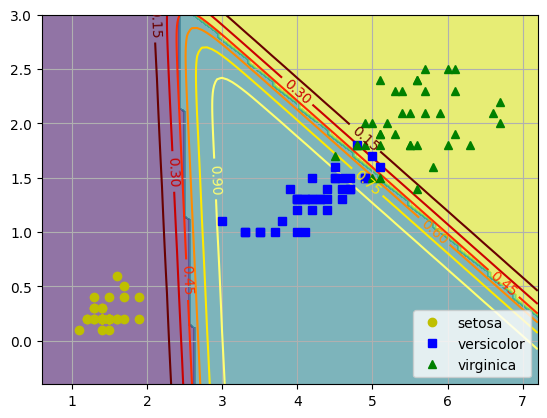

In [81]:
def plot_boundary(model , x , y):
    x_new_petal_length = np.linspace(x[: , 0].min() - 0.5 , x[: , 0].max() + 0.5 , 100)
    x_new_petal_width = np.linspace(x[: , 1].min() - 0.5 , x[: , 1].max() +0.5 , 100)
    
    x_grid_length , x_grid_width = np.meshgrid(x_new_petal_length , x_new_petal_width)
    x_new_data = np.c_[x_grid_length.ravel() , x_grid_width.ravel()]
    
    y_pred = model.predict(x_new_data).reshape(x_grid_length.shape)
    y_proba = model.predict_proba(x_new_data)[: , 1].reshape(x_grid_length.shape)
    

    
    #plot contour
    
    plt.contourf(x_grid_length , x_grid_width , y_pred , alpha=0.6 , cmap="viridis")
    contour = plt.contour(x_grid_length , x_grid_width , y_proba , cmap="hot")
    plt.clabel(contour , inline=1)
    
    #plot orginal data
    
    plt.plot(x[: , 0][y==0] , x[: , 1][y == 0] , "yo" , label="setosa")
    plt.plot(x[: , 0][y==1] , x[: , 1][y==1] , "bs" , label="versicolor")
    plt.plot(x[: , 0][y==2] , x[: , 1][y==2] , "g^" , label="virginica")
    
    plt.grid()
    plt.legend(loc="best")
    
    
    
plot_boundary(softmax_reg , x_train , y_train)
    
    
        

In [78]:
y_pred_test = softmax_reg.predict(x_test)
print(f"accuracy score : {accuracy_score(y_test , y_pred_test)},\n"
      f"recall : {recall_score(y_test , y_pred_test , average="weighted")},\n"
      f"precision score : {precision_score(y_test , y_pred_test , average="weighted")},\n"
      f"f1 score :  {f1_score(y_test , y_pred_test , average="weighted")}")



accuracy score : 1.0,
recall : 1.0,
precision score : 1.0,
f1 score :  1.0


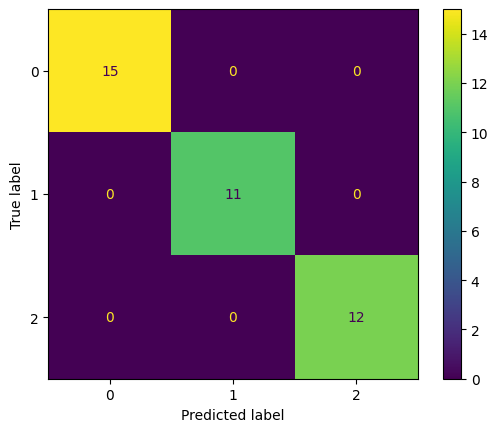

In [79]:
cm = confusion_matrix(y_test , y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()